In [2]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
import os
import matplotlib.pyplot as plt
import cv2

In [3]:
image_dims = 128
batch_size = 64

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(image_dims, image_dims, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

# The number of nodes in the Dense layer should match the output of the Flatten layer
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 64)       

In [6]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
import os
from keras.preprocessing.image import ImageDataGenerator

# Define your image dimensions and batch size
image_dims = 224
batch_size = 32

# Update the input path using a raw string
input_path = r'C:\Users\ARNAB\Desktop\diabetes2'

# Generate Training data:
training_data_generator = ImageDataGenerator(rescale=1./255,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              horizontal_flip=True)

# Use os.path.join to concatenate paths
training_gen = training_data_generator.flow_from_directory(directory=os.path.join(input_path, 'train'),
                                                            target_size=(image_dims, image_dims),
                                                            batch_size=batch_size,
                                                            class_mode='binary')


Found 2076 images belonging to 2 classes.


In [10]:
# Generate Validation data:
validation_data_generator = ImageDataGenerator(rescale=1./255)

# Use os.path.join to concatenate paths
validation_gen = validation_data_generator.flow_from_directory(directory=os.path.join(input_path, 'valid'),
                                                                target_size=(image_dims, image_dims),
                                                                batch_size=batch_size,
                                                                class_mode='binary')


Found 531 images belonging to 2 classes.


In [11]:
# Generate Validation data:
validation_data_generator = ImageDataGenerator(rescale=1./255)

validation_gen = validation_data_generator.flow_from_directory(directory=os.path.join(input_path, 'valid'),
                                                               target_size=(image_dims, image_dims),
                                                               batch_size=batch_size,
                                                               class_mode='binary')


Found 531 images belonging to 2 classes.


In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and batch size
image_dims = 224
batch_size = 32

# Define the input path
input_path = r'C:\Users\ARNAB\Desktop\diabetes2'


# Create the model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(image_dims, image_dims, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create data generators
training_data_generator = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
training_gen = training_data_generator.flow_from_directory(directory=os.path.join(input_path, 'train'),
                                                           target_size=(image_dims, image_dims),
                                                           batch_size=batch_size,
                                                           class_mode='binary')
validation_data_generator = ImageDataGenerator(rescale=1./255)
validation_gen = validation_data_generator.flow_from_directory(directory=os.path.join(input_path, 'valid'),
                                                               target_size=(image_dims, image_dims),
                                                               batch_size=batch_size,
                                                               class_mode='binary')
test_data_generator = ImageDataGenerator(rescale=1./255)
test_gen = test_data_generator.flow_from_directory(directory=os.path.join(input_path, 'test'),
                                                   target_size=(image_dims, image_dims),
                                                   batch_size=128,
                                                   class_mode='binary')

# Train the model
epochs = 10
history = model.fit_generator(training_gen,
                              steps_per_epoch=10,
                              epochs=epochs,
                              validation_data=validation_gen,
                              validation_steps=validation_gen.samples)

# Evaluate the model on test data
eval_result = model.evaluate_generator(test_gen)
print('Loss rate at evaluation data:', eval_result[0])
print('Accuracy rate at evaluation data:', eval_result[1])


Found 2076 images belonging to 2 classes.
Found 531 images belonging to 2 classes.
Found 231 images belonging to 2 classes.


C:\Users\ARNAB\AppData\Local\Temp\ipykernel_20396\3621821890.py:50: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_gen,


Epoch 1/10


10/10 [==============================] - 51s 4s/step - loss: 0.8003 - accuracy: 0.6108 - val_loss: 0.6572 - val_accuracy: 0.6215
Epoch 2/10
10/10 [==============================] - 20s 2s/step - loss: 0.6527 - accuracy: 0.6062
Epoch 3/10
10/10 [==============================] - 19s 2s/step - loss: 0.5442 - accuracy: 0.7722
Epoch 4/10
10/10 [==============================] - 17s 2s/step - loss: 0.4707 - accuracy: 0.7563
Epoch 5/10
10/10 [==============================] - 18s 2s/step - loss: 0.4561 - accuracy: 0.7969
Epoch 6/10
10/10 [==============================] - 18s 2s/step - loss: 0.4275 - accuracy: 0.8031
Epoch 7/10
10/10 [==============================] - 18s 2s/step - loss: 0.4159 - accuracy: 0.8000
Epoch 8/10
10/10 [==============================] - 17s 2s/step - loss: 0.3352 - accuracy: 0.8438
Epoch 9/10
10/10 [==============================] - 18s 2s/step - loss: 0.3543 - accuracy: 0.8344
Epoch 10/10
10/10 [==============================] - 17s 2s/step - loss: 0

C:\Users\ARNAB\AppData\Local\Temp\ipykernel_20396\3621821890.py:57: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  eval_result = model.evaluate_generator(test_gen)


Loss rate at evaluation data: 0.2541622519493103
Accuracy rate at evaluation data: 0.8961039185523987


In [13]:
epochs = 10
history = model.fit_generator(training_gen,
             steps_per_epoch= 10,
             epochs = epochs,
             validation_data=validation_gen,
             validation_steps= validation_gen.samples)

C:\Users\ARNAB\AppData\Local\Temp\ipykernel_20396\3023415710.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_gen,


Epoch 1/10
10/10 [==============================] - 29s 3s/step - loss: 0.3602 - accuracy: 0.8406 - val_loss: 0.2606 - val_accuracy: 0.8832
Epoch 2/10
10/10 [==============================] - 17s 2s/step - loss: 0.2811 - accuracy: 0.8750
Epoch 3/10
10/10 [==============================] - 18s 2s/step - loss: 0.2994 - accuracy: 0.8594
Epoch 4/10
10/10 [==============================] - 19s 2s/step - loss: 0.2713 - accuracy: 0.9062
Epoch 5/10
10/10 [==============================] - 17s 2s/step - loss: 0.2144 - accuracy: 0.9241
Epoch 6/10
10/10 [==============================] - 17s 2s/step - loss: 0.2287 - accuracy: 0.9082
Epoch 7/10
10/10 [==============================] - 16s 2s/step - loss: 0.2899 - accuracy: 0.8719
Epoch 8/10
10/10 [==============================] - 16s 2s/step - loss: 0.2882 - accuracy: 0.9000
Epoch 9/10
10/10 [==============================] - 16s 2s/step - loss: 0.2810 - accuracy: 0.9031
Epoch 10/10
10/10 [==============================] - 17s 2s/step - loss: 0.2

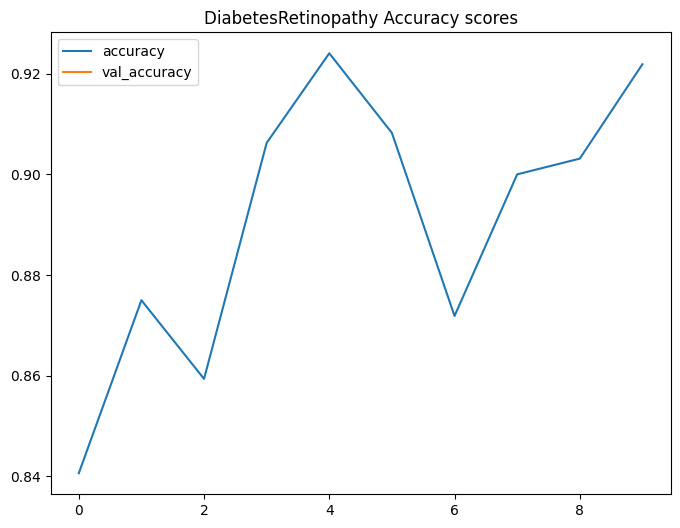

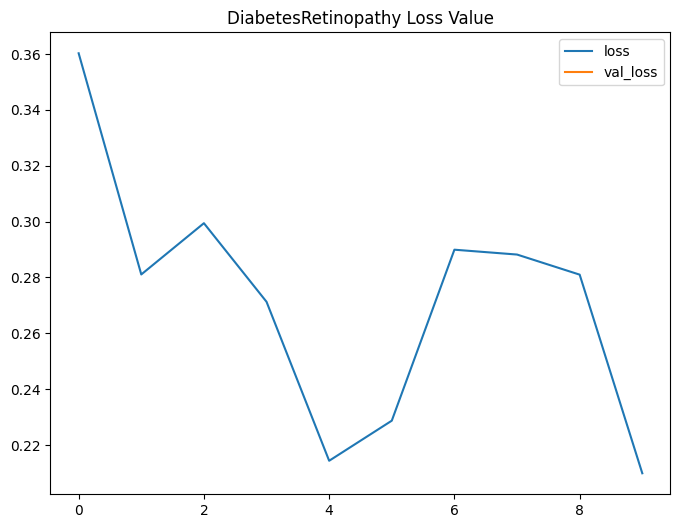

In [14]:
plt.figure(figsize=(8,6))
plt.title('DiabetesRetinopathy Accuracy scores')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

plt.figure(figsize=(8,6))
plt.title('DiabetesRetinopathy Loss Value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()